In [22]:
# -*- coding: utf-8 -*-
# ・不動産のデータが以下の条件で取得した　
# 　　　　市区町村名：品川区　
# 　　　　種類　　　：中古マンション等
#　・分析対象：
# 　　　　用途	　　：住宅


import matplotlib.pyplot as plt  # 数据可视化
import pandas as pd  # 数据处理和分析
import numpy as np  # 科学计算
import seaborn as sns
import time
# 导入必要的机器学习库
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV  # 数据划分、交叉验证、学习曲线、网格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer # 数据标准化、多项式特征
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # 回归模型
from sklearn.svm import SVR  # 支持向量回归
from sklearn.ensemble import RandomForestRegressor  # 随机森林回归
from sklearn.metrics import mean_squared_error, r2_score  # 模型评估

# 线性回归适用场景: 房价预测 ； 股票预测 ； 流量预测

# 数据基本处理
# 分割数据
# 特征工程-标准化
# 线性回归
# 模型评估
# 需要导入的API


# 加载数据集
file_path = './Tokyo_Shinagawa Ward_20151_20234.csv'
df = pd.read_csv(file_path,encoding="cp932")

df.head()


,種類,価格情報区分,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,...,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時期,改装,取引の事情等
0,中古マンション等,成約価格情報,13109,東京都,品川区,荏原,武蔵小山,10.0,66000000,３ＬＤＫ,...,2011年,ＲＣ,NaN,NaN,商業,NaN,NaN,2021年第1四半期,NaN,NaN
1,中古マンション等,成約価格情報,13109,東京都,品川区,荏原,武蔵小山,7.0,43000000,１ＬＤＫ,...,2018年,ＲＣ,NaN,NaN,商業,NaN,NaN,2021年第1四半期,NaN,NaN
2,中古マンション等,成約価格情報,13109,東京都,品川区,荏原,荏原中延,9.0,38000000,１ＬＤＫ,...,2010年,ＲＣ,NaN,NaN,商業,NaN,NaN,2021年第1四半期,NaN,NaN
3,中古マンション等,成約価格情報,13109,東京都,品川区,荏原,武蔵小山,7.0,19000000,１Ｋ,...,2000年,ＳＲＣ,NaN,NaN,商業,NaN,NaN,2021年第1四半期,NaN,NaN
4,中古マンション等,成約価格情報,13109,東京都,品川区,荏原,西小山,8.0,55000000,２ＬＤＫ,...,1991年,ＲＣ,NaN,NaN,１種住居,NaN,NaN,2021年第1四半期,NaN,NaN


In [23]:
# 基本的なデータ情報
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   種類         9634 non-null   object 
 1   価格情報区分     9634 non-null   object 
 2   市区町村コード    9634 non-null   int64  
 3   都道府県名      9634 non-null   object 
 4   市区町村名      9634 non-null   object 
 5   地区名        9634 non-null   object 
 6   最寄駅：名称     9545 non-null   object 
 7   最寄駅：距離（分）  9544 non-null   float64
 8   取引価格（総額）   9634 non-null   int64  
 9   間取り        9343 non-null   object 
 10  面積（㎡）      9634 non-null   int64  
 11  建築年        9400 non-null   object 
 12  建物の構造      9459 non-null   object 
 13  用途         5632 non-null   object 
 14  今後の利用目的    6621 non-null   object 
 15  都市計画       9180 non-null   object 
 16  建ぺい率（％）    6878 non-null   float64
 17  容積率（％）     6878 non-null   float64
 18  取引時期       9634 non-null   object 
 19  改装         6003 non-null   object 
 20  取引の事情等  

In [24]:
# データのクリーニング
# 欠損値の確認
print(df.isnull().sum())

種類              0
価格情報区分          0
市区町村コード         0
都道府県名           0
市区町村名           0
地区名             0
最寄駅：名称         89
最寄駅：距離（分）      90
取引価格（総額）        0
間取り           291
面積（㎡）           0
建築年           234
建物の構造         175
用途           4002
今後の利用目的      3013
都市計画          454
建ぺい率（％）      2756
容積率（％）       2756
取引時期            0
改装           3631
取引の事情等       9597
dtype: int64


In [25]:
# 打印每一列的唯一值和唯一值的数量
columns = ['市区町村名','地区名','最寄駅：名称','最寄駅：距離（分）','取引価格（総額）','間取り','面積（㎡）','建築年','建物の構造','用途','今後の利用目的','都市計画','建ぺい率（％）','容積率（％）','取引時期','改装','取引の事情等']

for column in columns:
    unique_values = df[column].unique()
    unique_count = df[column].nunique()
    print(f"{column}: 有 {unique_count} 个唯一值。")
    print(f"这些唯一值是: {unique_values}")
    print()

市区町村名: 有 1 个唯一值。
这些唯一值是: ['品川区']

地区名: 有 25 个唯一值。
这些唯一值是: ['荏原' '大井' '上大崎' '西大井' '西品川' '勝島' '北品川' '小山台' '戸越' '中延' '西五反田' '旗の台'
 '東五反田' '平塚' '南品川' '小山' '西中延' '東大井' '東品川' '東中延' '二葉' '八潮' '豊町' '大崎' '南大井']

最寄駅：名称: 有 34 个唯一值。
这些唯一值是: ['武蔵小山' '荏原中延' '西小山' '大井町' '目黒' '西大井' '大森(東京)' '中延' '大崎' '馬込' '旗の台' '恵比寿'
 '高輪台' nan '白金台' '大井競馬場前' '立会川' '北品川' '品川' '戸越' '不動前' '五反田' '青物横丁' '新馬場'
 '戸越公園' '荏原町' '大崎広小路' '戸越銀座' '洗足' '品川シーサイド' '鮫洲' '天王洲アイル' '下神明' '大森海岸'
 '長原(東京)']

最寄駅：距離（分）: 有 18 个唯一值。
这些唯一值是: [10.  7.  9.  8.  4. 13.  5.  1.  6.  3.  2. 12. 11. 16. nan 15. 14.  0.
 18.]

取引価格（総額）: 有 160 个唯一值。
这些唯一值是: [  66000000   43000000   38000000   19000000   55000000   37000000
   47000000   20000000   30000000   84000000   51000000   60000000
   92000000   83000000   53000000  120000000   70000000   69000000
   62000000  110000000  200000000   88000000  190000000  170000000
   54000000   36000000   61000000    9300000   48000000   31000000
   45000000   89000000   72000000  100000000   64000000   7400000

In [26]:
# 欠損値があれば削除（または適切な方法で補完）
df = df.dropna()
# 日付データをdatetime型に変換
#df['d取引時期'] = pd.to_datetime(df['取引時期'])
#print(df['d取引時期'])

# 年を取り出す関数を定義
def extract_year(dates):
    return np.array([int(date[:4]) for date in dates]).reshape(-1, 1)

# FunctionTransformerを作成
year_extractor = FunctionTransformer(extract_year)

# データを変換
years = year_extractor.transform(df['建築年'])

# 変換されたデータをフラット化して代入
df['建築年Int'] = years.flatten()

print(df)


            種類     価格情報区分  市区町村コード 都道府県名 市区町村名   地区名  最寄駅：名称  最寄駅：距離（分）  \
3053  中古マンション等  不動産取引価格情報    13109   東京都   品川区    大井     大井町        6.0   
3603  中古マンション等  不動産取引価格情報    13109   東京都   品川区   北品川      大崎        7.0   
3745  中古マンション等  不動産取引価格情報    13109   東京都   品川区   北品川     新馬場        6.0   
4389  中古マンション等  不動産取引価格情報    13109   東京都   品川区  西五反田   大崎広小路        8.0   
4390  中古マンション等  不動産取引価格情報    13109   東京都   品川区  西五反田   大崎広小路        8.0   
5066  中古マンション等  不動産取引価格情報    13109   東京都   品川区   西中延    戸越銀座       10.0   
5103  中古マンション等  不動産取引価格情報    13109   東京都   品川区   旗の台     旗の台        5.0   
5117  中古マンション等  不動産取引価格情報    13109   東京都   品川区   旗の台     旗の台        3.0   
5258  中古マンション等  不動産取引価格情報    13109   東京都   品川区   東大井     大井町        9.0   
5521  中古マンション等  不動産取引価格情報    13109   東京都   品川区  東五反田      大崎        9.0   
6513  中古マンション等  不動産取引価格情報    13109   東京都   品川区   南大井  大森(東京)        3.0   
6680  中古マンション等  不動産取引価格情報    13109   東京都   品川区   南大井    大森海岸        6.0   
6686  中古マンション等  不動産取引価格情報

    地区名      取引価格（総額）
0    八潮  2.700000e+06
1   北品川  6.750000e+07
2   南大井  1.067500e+07
3    大井  2.200000e+07
4    平塚  1.500000e+07
5   旗の台  9.100000e+06
6  東五反田  2.000000e+07
7   東大井  1.625000e+07
8   西中延  2.000000e+07
9  西五反田  1.733333e+07


/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28526 (\N{CJK UNIFIED IDEOGRAPH-6F6E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24029 (\N{CJK UNIF

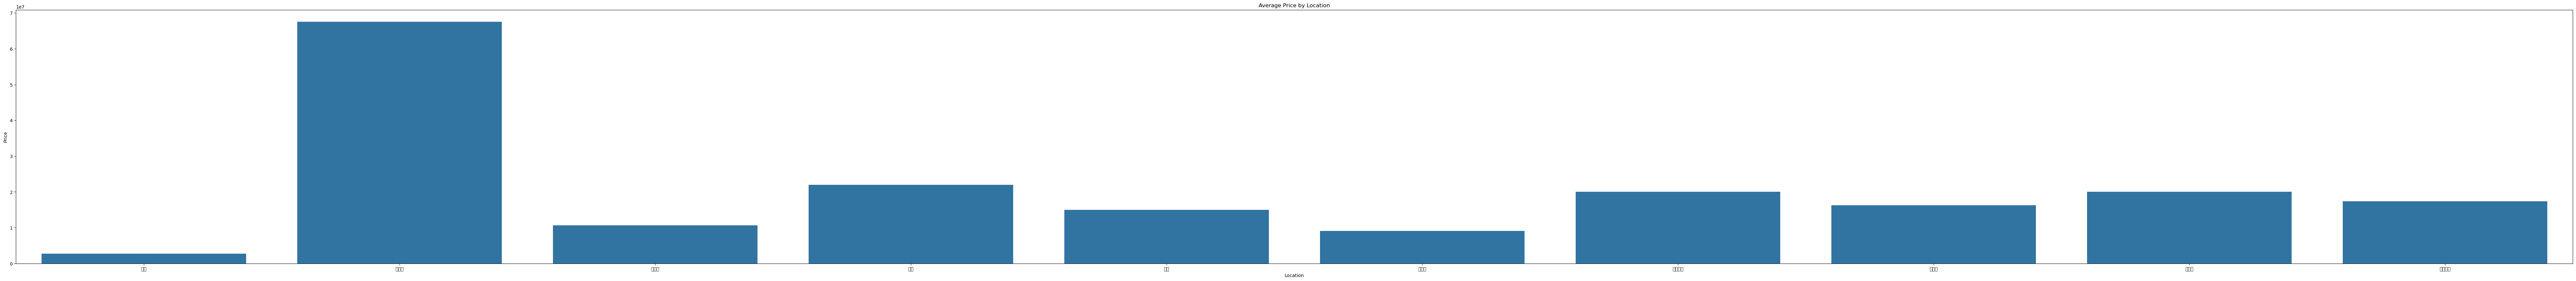

In [27]:
# 品川区のみの分析
shinagawa_df = df[df['市区町村名'] == '品川区']
shinagawa_df = df[df['今後の利用目的'] == '住宅']

# 地域ごとの平均価格を計算
location_mean_price = shinagawa_df.groupby('地区名')['取引価格（総額）'].mean().reset_index()
print(location_mean_price)
# 地域ごとの平均価格を可視化
plt.figure(figsize=(100, 10))
sns.barplot(x='地区名', y='取引価格（総額）', data=location_mean_price)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39365 (\N{CJK UNIFIED IDEOGRAPH-99C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Shinagawa/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRA

      最寄駅：距離（分）  取引価格（総額）  面積（㎡）  建築年Int  建ぺい率（％）  容積率（％）
3053        6.0  22000000     20    2008     80.0   500.0
3603        7.0  68000000     75    1996     60.0   300.0
3745        6.0  67000000     90    1979     80.0   500.0
4389        8.0  19000000     85    1980     80.0   700.0
4390        8.0  20000000     90    1980     80.0   700.0
5066       10.0  20000000     15    1998     80.0   500.0
5117        3.0   9100000     15    1986     80.0   400.0
5258        9.0   9500000     15    1992     60.0   200.0
5521        9.0  20000000     50    1976     60.0   300.0
6513        3.0  17000000     50    1970     80.0   500.0
6680        6.0   6000000     20    1987     80.0   500.0
6686        6.0   9700000     20    1987     80.0   500.0
8663        8.0  13000000     45    1980     80.0   700.0
9077        4.0  23000000     45    1979     80.0   500.0
9107        5.0  12000000     20    1980     80.0   500.0
9129        4.0  28000000     30    1998     80.0   500.0
9331        6.

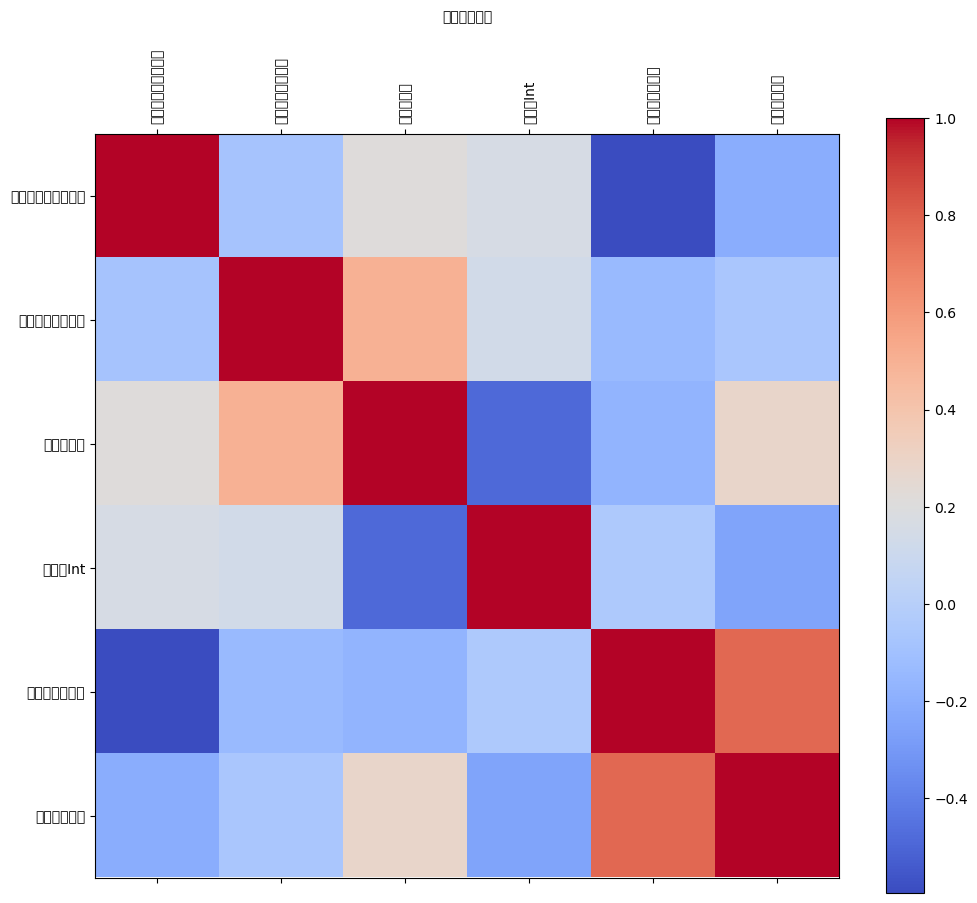

In [28]:
# 分析可能列のみを抽出する
selected_columns = ['最寄駅：距離（分）','取引価格（総額）','面積（㎡）','建築年Int','建ぺい率（％）','容積率（％）']
shinagawa_selected_df = shinagawa_df[selected_columns]
print(shinagawa_selected_df)

# 计算并显示各特征之间的相关性
correlation_matrix = shinagawa_selected_df.corr()
print(correlation_matrix)

# 可视化相关系数矩阵
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('相关系数矩阵', pad=20, fontproperties='SimHei')
plt.show()

In [29]:
# 数据预处理
X = shinagawa_selected_df.drop('取引価格（総額）', axis=1)  # 将数据分为特征变量（X）和目标变量（y）
y = shinagawa_selected_df['取引価格（総額）']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义要评估的模型和参数
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor()
}

params = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 0.5, 1.0]},
    'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# 进行网格搜索和交叉验证

best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} 最佳参数: {grid_search.best_params_}')
print('-------------------------------------------------------')

# 评估每个模型的性能
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
print('---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---')
print('')
print(f'{name} - 计算均方误差 (MSE): {mse}')
print('-------------------------------------------------------')
print('')
print('--- R² : 反映模型解释数据变异的程度，值越接近1越好---')
print('')
print(f'{name} - 决定系数 (R²): {r2}')
print('')
print('-------------------------------------------------------')

print('')
print('---耗时---训练数据得分---测试数据得分-------------')
# 模型评分和时间记录
def polynomial_model(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

model = polynomial_model(degree=2)
start = time.process_time()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("elaspe:{0:.6f};train_score:{1:0.6f};test_score:{2:.6f}"
      .format(time.process_time() - start, train_score, test_score))
print('-------------------------------------------------------')

LinearRegression 最佳参数: {}
Ridge 最佳参数: {'alpha': 10.0}
Lasso 最佳参数: {'alpha': 1.0}
SVR 最佳参数: {'C': 10.0, 'kernel': 'poly'}
RandomForest 最佳参数: {'max_depth': 20, 'n_estimators': 100}
-------------------------------------------------------
---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---

RandomForest - 计算均方误差 (MSE): 658029549750000.0
-------------------------------------------------------

--- R² : 反映模型解释数据变异的程度，值越接近1越好---

RandomForest - 决定系数 (R²): -0.3029852710367351

-------------------------------------------------------

---耗时---训练数据得分---测试数据得分-------------
elaspe:0.001312;train_score:1.000000;test_score:-1.354613
-------------------------------------------------------
